# Cell Types Project
### Exploring L4 & L5 Neuronal Dynamics in Epilepsy of Human Specimens and the Gene Expression in Human Temporal Lobe

## Team Member Names & Contributions

- **Ber Al Jaibaji A16810381**: Data Wrangling, Statistics, Visualization
- **Elizaveta Beltyukova**: Background Research, Formatting
- **Doris Tian A18601529**: Background Research, Data Wrangling, Referencing, Formatting

## Abstract

## Research Question

#### How do Layer 4 (L4) and Layer 5 (L5) neurons differ in their electrophysiological properties and gene expression profiles in epileptic versus non-epileptic conditions across mice vs. human groups?

### Background and Prior Work

Epilepsy is a prevalent neurological disorder characterized by recurrent seizures, affecting millions worldwide. Despite its commonality, the underlying mechanisms remain complex and not fully understood. The traditional view attributes epilepsy to an imbalance between excitatory and inhibitory neuronal activity. According to Pascual 2007, 30% of epilepsy patients don’t have full control of their condition, which inspires further pursuit of research. Recent studies have revealed intriguing differences in neuronal activity between epileptic and non-epileptic individuals, particularly in cortical layers 4 and 5. A 2023 study found significantly higher firing rates in the granular layer (L4) neurons of epileptic individuals compared to non-epileptic controls (Bod et. al. 2023). Complementary research on Layer 5 (L5) neurons showed upregulation of genes encoding glutamate receptor subunits, AMPA receptor components, and voltage-gated ion channels (Pfisterer et al 2020). 

These findings suggest that both L4 and L5 neurons play crucial roles in epileptic hyperexcitation, albeit through different mechanisms.However, there is a research gap between the difference in L4 and L5 neurons in epilepsy. By comparing these two layers electrophysiologically and morphologically, we aim to to investigate the difference in electrophysiology and morphology of L4 and L5 neurons in epileptic individuals.We also aim to provide information on the transcriptomics of temporal lobe as a guideline for studying temporal lobe epilepsy.

The first data modality we incorporate to address the question is the Allen Brain Atlas Cell Features dataset, which contains both electrophysiological recordings and morphology of neurons. There are a total of 2333 observations and 54 columns, including human with epilepsy or tumour and transgenic mouse line data. We filtered the dataset to only include the human (Homo Sapiens) with diagnosed epilepsy with a focus on middle temporal gyrus (MTG), which left us with 299 observations.The second data modality is the Human Brain Microarray data from Allen Brain Atlas. This dataset includes data that reflects gene expression in 6 human subjects. Although almost all brain areas are covered, we primarily focused on the data obtained from temporal lobe. However, this data does not include any information about the disease state of the human subjects, therefore it is used to overview the gene expression in temporal lobe.


### References (include links):

(1)Pascual MR. Temporal lobe epilepsy: clinical semiology and neurophysiological studies. Semin Ultrasound CT MR. 2007 Dec;28(6):416-23. doi: 10.1053/j.sult.2007.09.004. PMID: 18074998. https://www.sciencedirect.com/science/article/pii/S0920121196000435
(2)Bod R, Tóth K, Essam N, Tóth EZ, Erõss L, Entz L, Bagó AG, Fabó D, Ulbert I, Wittner L. Synaptic alterations and neuronal firing in human epileptic neocortical excitatory networks. Front Synaptic Neurosci. 2023 Aug 10;15:1233569. doi: 10.3389/fnsyn.2023.1233569. PMID: 37635750; PMCID: PMC10450510.https://pmc.ncbi.nlm.nih.gov/articles/PMC10450510/#:~:text=Granular%20layer%20(L4)%20neurons%20showed,during%20blockade%20of%20glutamate%20receptors
(3)Pfisterer, U., Petukhov, V., Demharter, S. et al. Identification of epilepsy-associated neuronal subtypes and gene expression underlying epileptogenesis. Nat Commun 11, 5038 (2020). https://doi.org/10.1038/s41467-020-18752-7.https://www.nature.com/articles/s41467-020-18752-7
(4)Cell types feature data: https://celltypes.brain-map.org/data
(5)Microarray data: https://human.brain-map.org/microarray/search/show?search_term=94&search_type=gene_classification


### Hypothesis

It is hypothesized that L4 neurons show differences in morphology and electrophysiological properties suffering from epilepsy.

### Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm

## Data Wrangling

### Cell Types Data Wrangling

In [3]:
#file_path = "/home/bmaljaibaji/cell_types_specimen_details_mouse.csv"

#cell_features_df = pd.read_csv(file_path)

cell_features_df = pd.read_csv('cell_types_specimen_details.csv')

print(f"Dataset Shape: {cell_features_df.shape}")
print("Available Columns:", cell_features_df.columns)


Dataset Shape: (2333, 54)
Available Columns: Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendr

In [4]:
#Cleaning data into human - MTG - epilepsy - L4/L5 layers
humancell_df = cell_features_df[cell_features_df['donor__species']=='Homo Sapiens']
human_MTG_data = humancell_df[humancell_df['structure__acronym']=='MTG']
epihumancell_df = human_MTG_data[human_MTG_data['donor__disease_state']== 'epilepsy']
epihumanL4_df = epihumancell_df[epihumancell_df['structure__layer']=='4']
epihumanL5_df = epihumancell_df[epihumancell_df['structure__layer']=='5']


ephys_columns = [
    'nr__max_euclidean_distance', 'nr__number_stems', 'nr__number_bifurcations',
    'nr__average_contraction', 'nr__average_parent_daughter_ratio', 'ef__fast_trough_v_long_square',
    'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation', 'ef__f_i_curve_slope',
    'ef__threshold_i_long_square', 'ef__tau', 'ef__avg_isi', 'ef__avg_firing_rate',
    'ef__ri', 'ef__peak_t_ramp', 'ef__vrest'
]


#
ephys_columns = [ 'ef__fast_trough_v_long_square','ef__upstroke_downstroke_ratio_long_square', 
                 'ef__adaptation', 'ef__f_i_curve_slope','ef__threshold_i_long_square', 'ef__tau',
                 'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp', 'ef__vrest']

morph_columns = ['nr__max_euclidean_distance', 'nr__number_stems', 'nr__number_bifurcations',
    'nr__average_contraction', 'nr__average_parent_daughter_ratio']

# Only keep the electrophysiology columns that are in the cell features data
ephys_columns_filtered = [col for col in ephys_columns if col in cell_features_df.columns]

morph_columns_filtered = [col for col in morph_columns if col in cell_features_df.columns]


# Drop all null values within our columns of interest
human_L4_ephys = epihumanL4_df[ephys_columns_filtered].dropna()
human_L5_ephys = epihumanL5_df[ephys_columns_filtered].dropna()
human_L4_morph = epihumanL4_df[morph_columns_filtered].dropna()
human_L5_morph = epihumanL5_df[morph_columns_filtered].dropna()


In [6]:
# Function to calculate statistics of cell features (mean, std, etc.) and save them to an array 
def compute_stats(data):
    if data.empty:
        return np.full((8, len(ephys_columns_filtered)), np.nan)
    
    return np.array([
        np.count_nonzero(~np.isnan(data), axis=0),
        np.nanmean(data, axis=0),
        np.nanstd(data, axis=0),
        np.nanmin(data, axis=0),
        np.nanpercentile(data, 25, axis=0),
        np.nanpercentile(data, 50, axis=0),
        np.nanpercentile(data, 75, axis=0),
        np.nanmax(data, axis=0)
    ])

# Apply the function on our specified columns
human_L4_stats = compute_stats(human_L4_ephys)
human_L5_stats = compute_stats(human_L5_ephys)
#mouse_L4_stats = compute_stats(mouse_L4_ephys)
#mouse_L5_stats = compute_stats(mouse_L5_ephys)

# Assign label names
stats_labels = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Create dataframes of L4 and L5 for each species, with indexes being the statistical labels,
# and columns being those that we filtered out earlier 
human_L4_ephys_stats_df = pd.DataFrame(human_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
human_L5_ephys_stats_df = pd.DataFrame(human_L5_stats, index=stats_labels, columns=ephys_columns_filtered)
human_L4_morph_stats_df = pd.DataFrame(human_L4_stats, index=stats_labels, columns=morph_columns_filtered)
human_L5_morph_stats_df = pd.DataFrame(human_L5_stats, index=stats_labels, columns=morph_columns_filtered)
#mouse_L4_stats_df = pd.DataFrame(mouse_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
#mouse_L5_stats_df = pd.DataFrame(mouse_L5_stats, index=stats_labels, columns=ephys_columns_filtered)

# Show all 4 of our dataframes
print("\nHuman Layer 4 (L4) Neuron Statistics:")
display(human_L4_morph_stats_df,human_L4_ephys_stats_df)

print("\nHuman Layer 5 (L5) Neuron Statistics:")
display(human_L5_morph_stats_df,human_L5_ephys_stats_df)


Human Layer 4 (L4) Neuron Statistics:


,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
Mean,-53.818752,3.070433,0.086973,0.281847,66.857143,27.364412,79.459793,17.387156,213.391023,4.174697,-67.956920
Std,6.071977,0.934274,0.159871,0.163740,41.111099,12.858803,57.625602,9.561184,86.429174,1.730262,4.275713
Min,-70.593750,1.277342,-0.015521,0.041667,20.000000,7.669349,22.193182,3.074842,74.218825,1.916387,-79.264778
25%,-55.109377,2.467762,0.024586,0.185575,45.000000,18.802180,50.493684,11.657826,148.649663,2.999253,-70.700451
50%,-52.593754,3.173174,0.054784,0.243497,50.000000,27.178200,63.898667,15.649779,220.312461,3.513787,-69.003845
75%,-49.593752,3.793024,0.086874,0.325193,70.000000,33.567180,85.952091,19.804808,267.890811,5.165713,-64.269100
Max,-42.781254,4.777959,0.971281,0.974647,210.000000,75.021607,325.220000,45.058884,438.750058,8.060820,-59.348194



Human Layer 5 (L5) Neuron Statistics:


,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
Mean,-53.063060,3.532136,0.150057,0.176677,81.785714,30.349544,133.823019,11.066624,178.891018,4.608484,-67.534462
Std,3.936359,0.923004,0.246023,0.100804,43.470316,9.878534,90.536861,6.698678,68.307930,2.006655,3.948609
Min,-65.031250,1.364448,-0.028861,0.046667,10.000000,7.919526,38.440000,2.236436,63.281059,1.449750,-74.642593
25%,-54.281251,3.052373,0.023032,0.097596,50.000000,26.424393,63.370000,6.008238,136.015691,3.179708,-70.526062
50%,-52.640629,3.515100,0.048272,0.156536,70.000000,29.297015,112.545429,8.890332,173.047103,4.293037,-67.653088
75%,-50.500000,4.180984,0.134333,0.243471,102.500000,35.056059,166.453000,15.780691,210.122824,5.243585,-64.821680
Max,-45.656254,5.808203,0.975859,0.483584,210.000000,68.592079,447.140000,26.014568,376.322120,9.750447,-59.171257


### Microarray data wrangling

In [13]:
#expression_df = pd.read_csv("/home/bmaljaibaji/Expression.csv")
#columns_df = pd.read_csv("/home/bmaljaibaji/Columns.csv")
#probes_df = pd.read_csv("/home/bmaljaibaji/Probes.csv")


## Data Analysis & Results

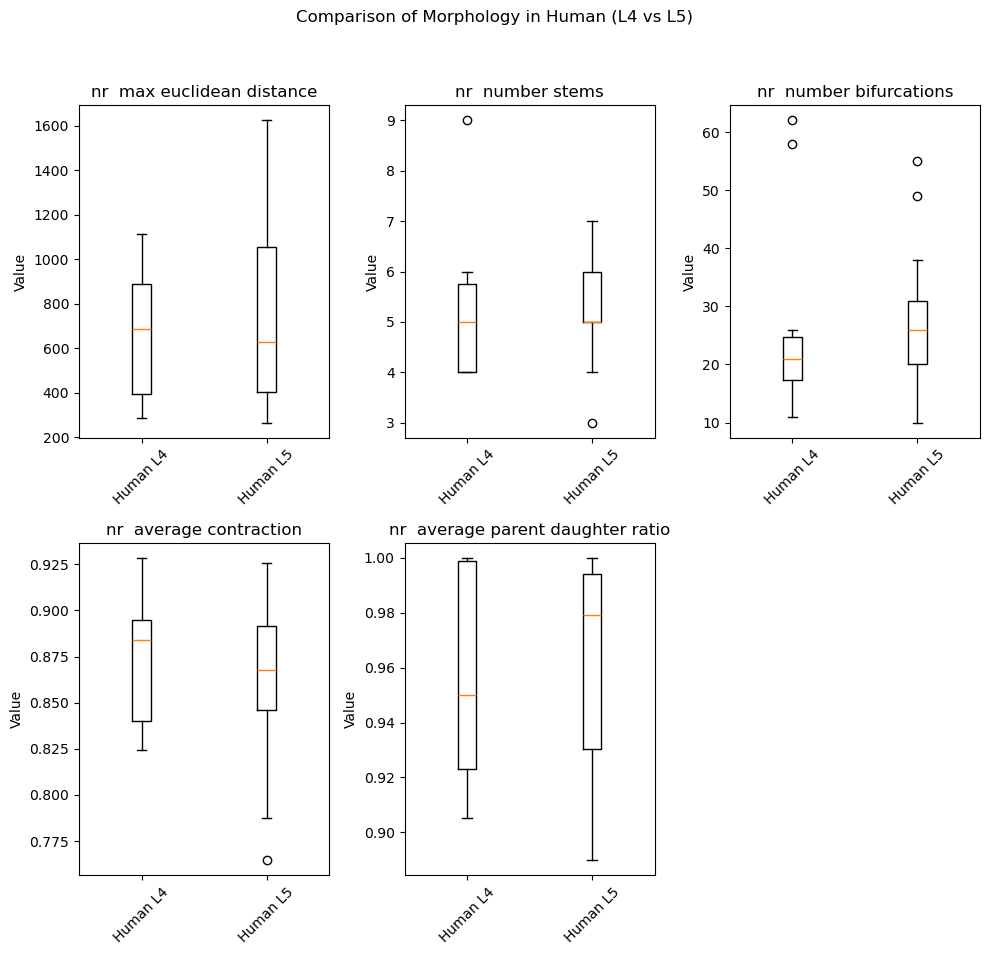

In [18]:
# Create a box plot comparing Morphology of L4 and L5 between mouse and human
plt.figure(figsize=(10, 10))

# Make a for loop that runs through the first 6 features (columns), drops null values
#  and makes a boxplot
for i, col in enumerate(morph_columns_filtered):  
    plt.subplot((len(morph_columns_filtered) - 1) // 3 + 1, 3, i + 1)
    plt.boxplot([
        human_L4_morph[col].dropna(), 
        human_L5_morph[col].dropna()
    ], labels=['Human L4', 'Human L5'])
    
    plt.title(col.replace('_', ' '))
    plt.ylabel('Value')
    plt.xticks(rotation=45)

plt.suptitle("Comparison of Morphology in Human (L4 vs L5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

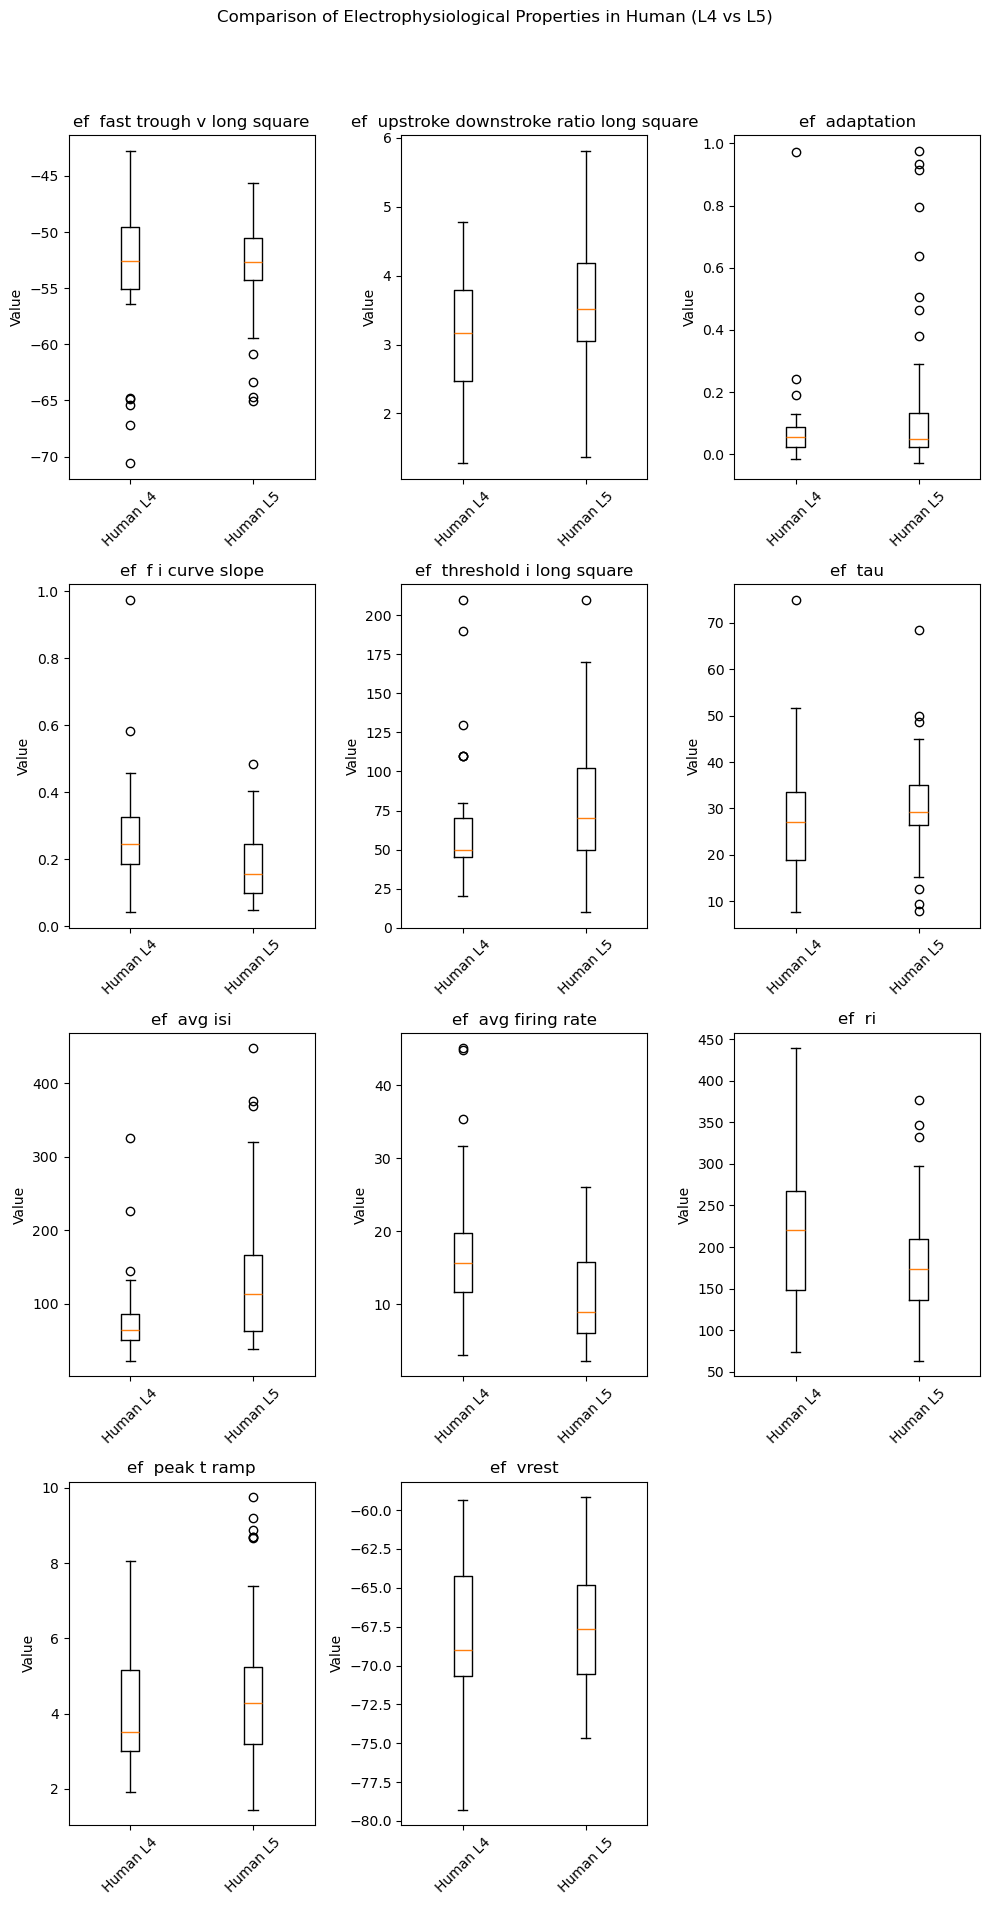

In [19]:
# Create a box plot comparing L4 and L5 between mouse and human
plt.figure(figsize=(10, 20))

# Make a for loop that runs through the first 6 features (columns), drops null values
#  and makes a boxplot
for i, col in enumerate(ephys_columns_filtered):  
    plt.subplot((len(ephys_columns_filtered) - 1) // 3 + 1, 3, i + 1)
    plt.boxplot([
        human_L4_ephys[col].dropna(), 
        human_L5_ephys[col].dropna()
    ], labels=['Human L4', 'Human L5'])
    
    plt.title(col.replace('_', ' '))
    plt.ylabel('Value')
    plt.xticks(rotation=45)

plt.suptitle("Comparison of Electrophysiological Properties in Human (L4 vs L5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Discussion

## Conclusion

## Supplementary

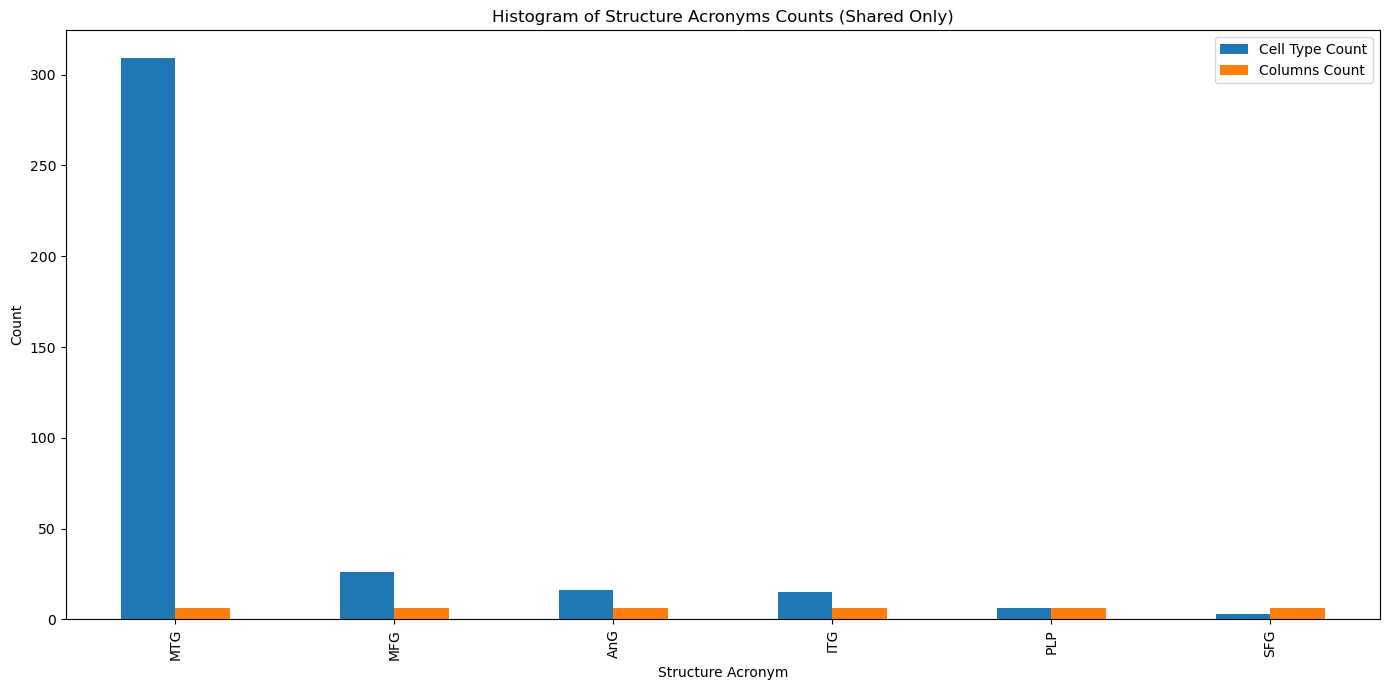

In [29]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Combine both counts into a dictionary
acronym_counts = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_counts[acronym] = {
            "Cell Type Count": cell_count,
            "Columns Count": column_count
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_counts, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Count", "Columns Count"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Count", "Columns Count"], ascending=False)

# Plot histograms
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Count", "Columns Count"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Count")
plt.title("Histogram of Structure Acronyms Counts (Shared Only)")
plt.xticks(rotation=90)
plt.legend(["Cell Type Count", "Columns Count"])
plt.tight_layout()
plt.show()




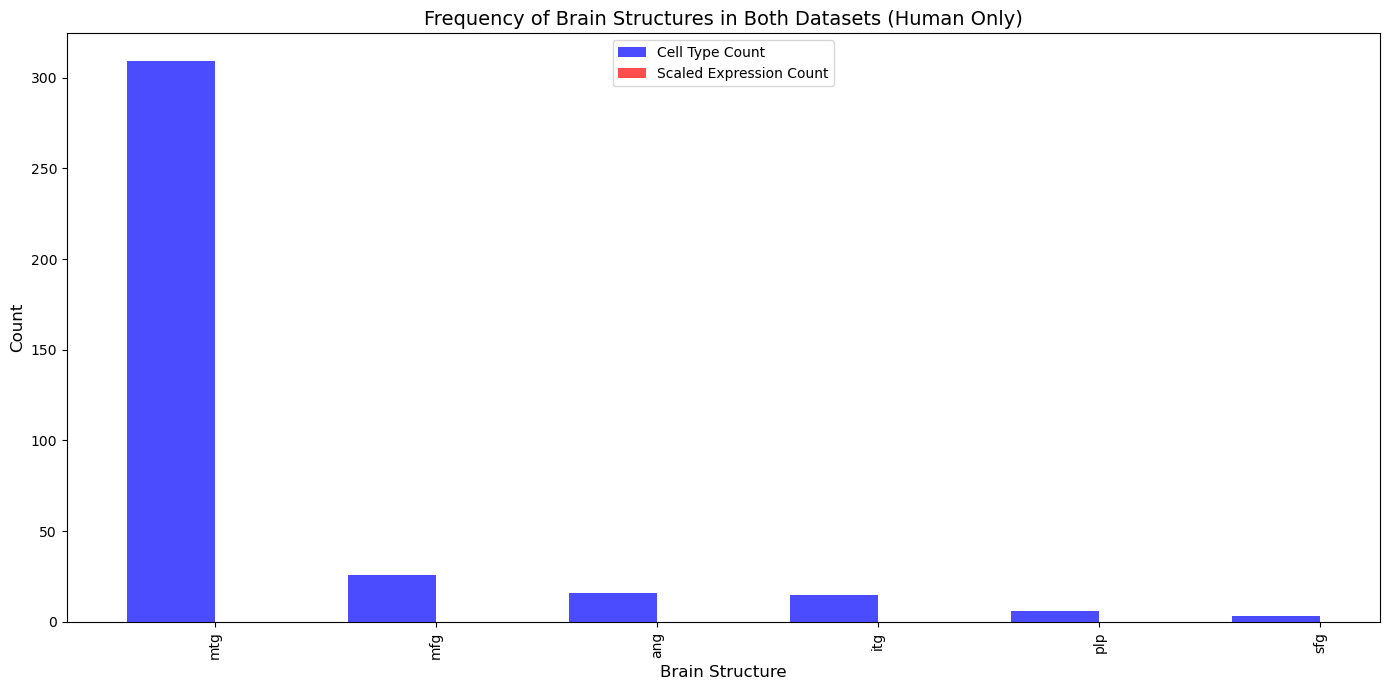

In [30]:

data = data[data["donor__species"] == "Homo Sapiens"]

# Use structure acronyms for better matching
data["structure_name"] = data["structure__acronym"].str.strip().str.lower()
columns_df["structure_name"] = columns_df["structure_abbreviation"].str.strip().str.lower()

# Count occurrences of each brain structure in both datasets
structure_counts_data = data["structure_name"].value_counts().reset_index()
structure_counts_data.columns = ["Brain Structure", "Cell Type Count"]

structure_counts_columns = columns_df["structure_name"].value_counts().reset_index()
structure_counts_columns.columns = ["Brain Structure", "Expression Count"]

# Merge counts into a single dataframe, keeping only matching structures
merged_counts = structure_counts_data.merge(structure_counts_columns, on="Brain Structure", how="inner")

# Sort by frequency for better visualization
merged_counts = merged_counts.sort_values(by=["Cell Type Count", "Expression Count"], ascending=False)

# Normalize expression counts using Min-Max normalization
min_expr = merged_counts["Expression Count"].min()
max_expr = merged_counts["Expression Count"].max()
merged_counts["Expression Count"] = (merged_counts["Expression Count"] - min_expr) / (max_expr - min_expr) * merged_counts["Cell Type Count"].max()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(merged_counts))  # Label locations
width = 0.4  # Width of the bars

ax.bar(x - width/2, merged_counts["Cell Type Count"], width, color="blue", alpha=0.7, label="Cell Type Count")
ax.bar(x + width/2, merged_counts["Expression Count"], width, color="red", alpha=0.7, label="Scaled Expression Count")

ax.set_xticks(x)
ax.set_xticklabels(merged_counts["Brain Structure"], rotation=90)
plt.xlabel("Brain Structure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Frequency of Brain Structures in Both Datasets (Human Only)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Include cells that describe the steps in your data analysis.

,Structure Acronym,Cell Type Frequency,Columns Frequency
4,MTG,0.748184,0.005917
5,MFG,0.062954,0.005917
2,AnG,0.038741,0.005917
3,ITG,0.036320,0.005917
0,PLP,0.014528,0.005917
1,SFG,0.007264,0.005917


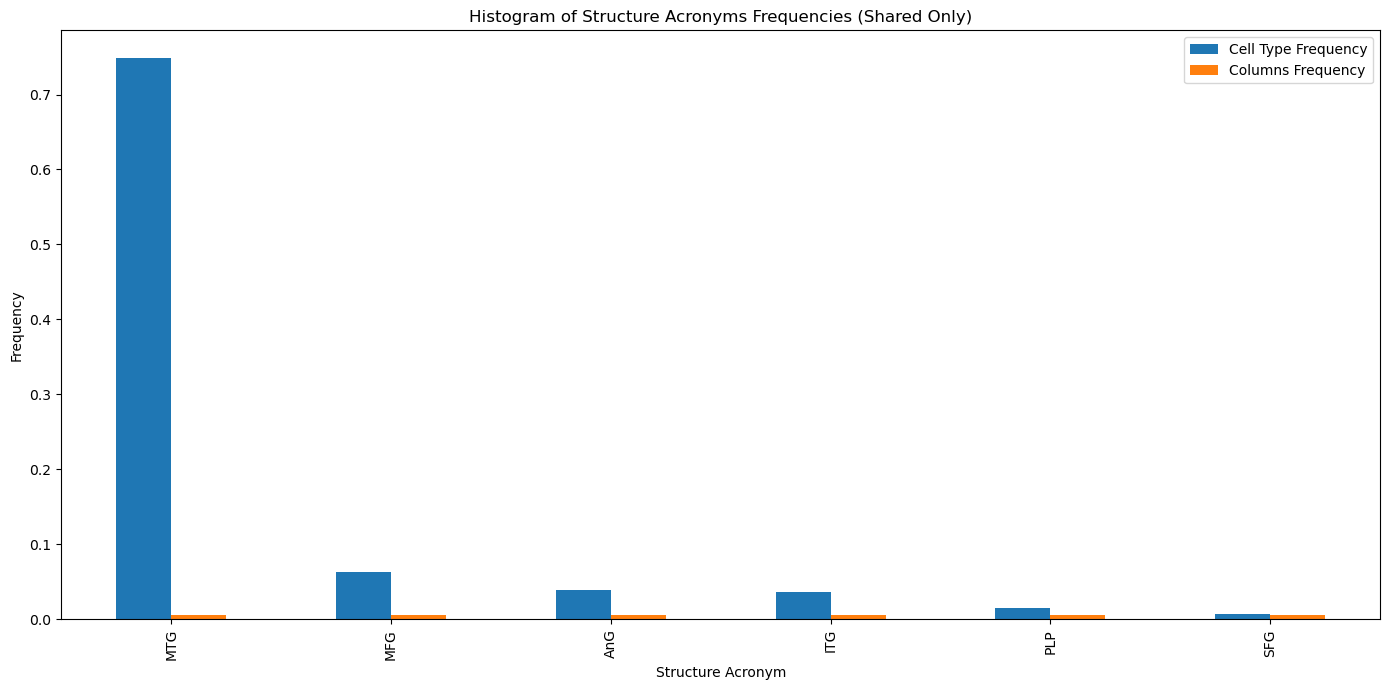

In [32]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Calculate total structure counts
total_cell_types = sum(cell_type_counts.values())
total_columns = sum(columns_counts.values())

# Combine both counts into a frequency dictionary
acronym_frequencies = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_frequencies[acronym] = {
            "Cell Type Frequency": cell_count / total_cell_types,
            "Columns Frequency": column_count / total_columns
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_frequencies, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Frequency", "Columns Frequency"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Frequency", "Columns Frequency"], ascending=False)

# Display the frequencies as a table
from IPython.display import display

display(acronym_df)

# Plot frequency histogram
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Frequency", "Columns Frequency"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Frequency")
plt.title("Histogram of Structure Acronyms Frequencies (Shared Only)")
plt.xticks(rotation=90)
plt.legend(["Cell Type Frequency", "Columns Frequency"])
plt.tight_layout()
plt.show()


In [15]:
# Merge expression data with column metadata
columns_filtered = columns_df[['structure_id', 'structure_abbreviation']].drop_duplicates()
expression_melted = expression_df.melt(id_vars=expression_df.columns[0], var_name="Sample", value_name="Expression")
columns_df["Sample"] = columns_df.index.astype(str)
expression_merged = expression_melted.merge(columns_df, on="Sample")
expression_summary = expression_merged.groupby("structure_abbreviation")["Expression"].mean().reset_index()

# Display gene expression summary
display(expression_summary)

# Plot histogram of gene expression per structure
plt.figure(figsize=(14, 7))
sns.barplot(data=expression_summary, x="structure_abbreviation", y="Expression", color='blue')
plt.xlabel("Structure Acronym")
plt.ylabel("Mean Gene Expression")
plt.title("Histogram of Gene Expression Across Structures")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'columns_df' is not defined

In [33]:
# Count unique donor names in both datasets
donor_counts = {
    "Cell Types Donor Count": data["donor__name"].nunique(),
    "Columns Donor Count": columns_df["donor_name"].nunique()
}

# Display donor counts
display(pd.DataFrame([donor_counts]))


,Cell Types Donor Count,Columns Donor Count
0,42,6


,Structure Acronym,Cell Type Frequency (Normalized),Columns Frequency (Normalized)
4,MTG,7.357143,1.0
5,MFG,0.619048,1.0
2,AnG,0.380952,1.0
3,ITG,0.357143,1.0
0,PLP,0.142857,1.0
1,SFG,0.071429,1.0


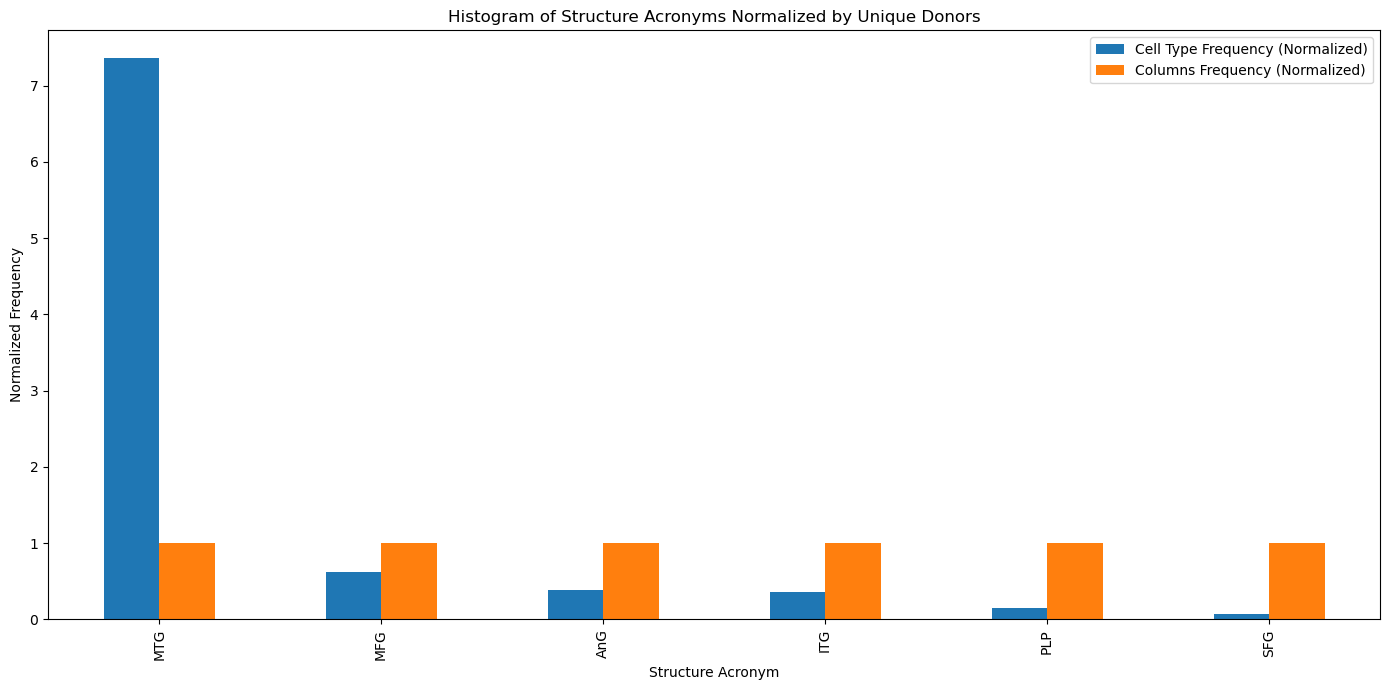

,Cell Types Donor Count,Columns Donor Count
0,42,6


In [34]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Count unique donor names in both datasets
cell_type_donor_count = data["donor__name"].nunique()
columns_donor_count = columns_df["donor_name"].nunique()

# Combine both counts into a frequency dictionary with normalization by donor count
acronym_frequencies = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_frequencies[acronym] = {
            "Cell Type Frequency (Normalized)": cell_count / cell_type_donor_count,
            "Columns Frequency (Normalized)": column_count / columns_donor_count
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_frequencies, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"], ascending=False)

# Display the frequencies as a table
display(acronym_df)

# Plot normalized frequency histogram
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of Structure Acronyms Normalized by Unique Donors")
plt.xticks(rotation=90)
plt.legend(["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"])
plt.tight_layout()
plt.show()

# Display donor counts
donor_counts = {
    "Cell Types Donor Count": cell_type_donor_count,
    "Columns Donor Count": columns_donor_count
}
display(pd.DataFrame([donor_counts]))


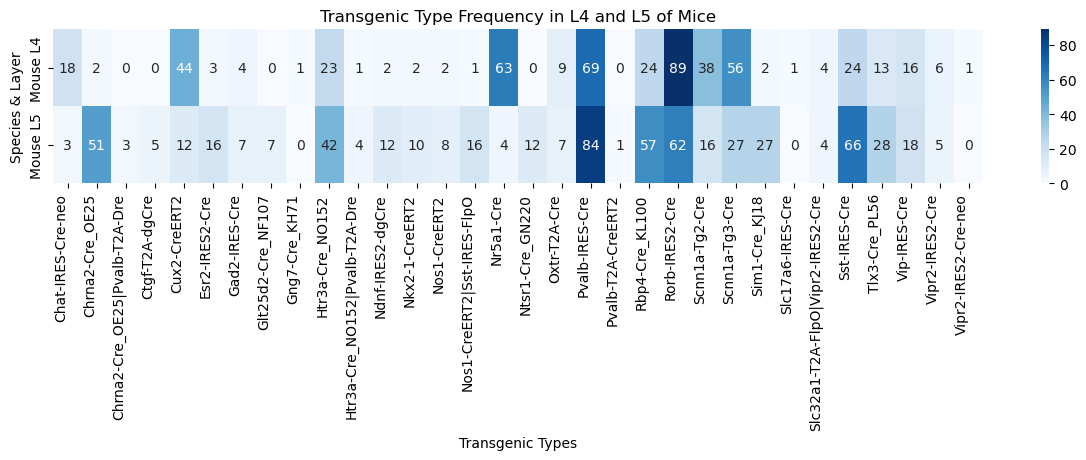

In [17]:
# Filter for Layer 4 (L4) and Layer 5 (L5)
l4_data = cell_features_df[cell_features_df['structure__layer'] == '4']
l5_data = cell_features_df[cell_features_df['structure__layer'] == '5']

# Separate human and mouse data
human_L4 = l4_data[l4_data['donor__species'] == 'Homo Sapiens']
human_L5 = l5_data[l5_data['donor__species'] == 'Homo Sapiens']
mouse_L4 = l4_data[l4_data['donor__species'] == 'Mus musculus']
mouse_L5 = l5_data[l5_data['donor__species'] == 'Mus musculus']

l4_l5_gene_counts = pd.concat([
    mouse_L4[['line_name']].assign(Species_Layer='Mouse L4'),
    mouse_L5[['line_name']].assign(Species_Layer='Mouse L5')
])


l4_l5_gene_counts = l4_l5_gene_counts.dropna()
gene_frequencies = l4_l5_gene_counts.groupby(['Species_Layer', 'line_name']).size().unstack(fill_value=0)


plt.figure(figsize=(15, 2))
sns.heatmap(gene_frequencies, annot=True, cmap="Blues", fmt="d")

plt.title("Transgenic Type Frequency in L4 and L5 of Mice")
plt.xlabel("Transgenic Types")
plt.ylabel("Species & Layer")
plt.xticks(rotation=90, ha="right")

plt.show()
